<a href="https://colab.research.google.com/github/JavZon/Course_WM/blob/main/Classification_task_Traditional_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

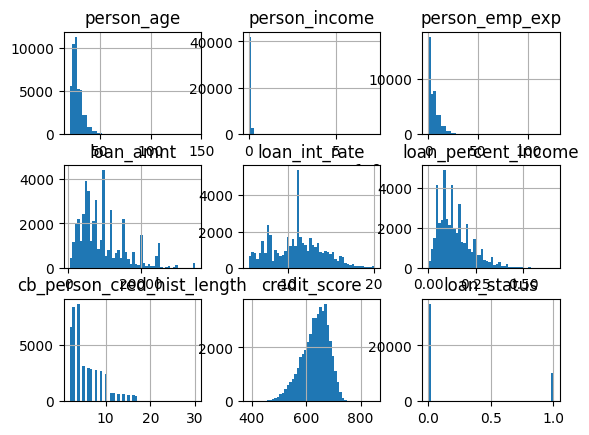

In [5]:
df.hist(bins=50)
plt.show()

<Axes: >

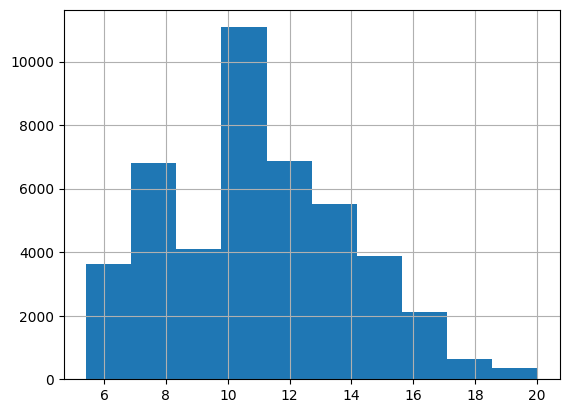

In [7]:
df['loan_int_rate'].hist()

In [8]:
df.head(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0


In [9]:
df['person_gender'].value_counts()

,count
person_gender,
male,24841
female,20159


In [10]:
df['person_education'].value_counts()

,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


In [11]:
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [12]:
df['previous_loan_defaults_on_file'].value_counts()

,count
previous_loan_defaults_on_file,
Yes,22858
No,22142


In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
df2=df.copy()

In [28]:
df2.head(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0


In [29]:
cols=['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

In [26]:
encoder=LabelEncoder()

def encode(df, cols):
  for col in cols:
    df[col]=encoder.fit_transform(df[col])
  return df

In [32]:
df2=encode(df2, cols)

In [33]:
df2.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
6099,24.0,1,4,56084.0,0,3,5975.0,1,14.46,0.11,2.0,665,0,1
896,21.0,1,1,20259.0,0,3,1000.0,5,15.65,0.05,3.0,604,0,1
35053,26.0,1,3,115018.0,4,3,14339.0,5,12.74,0.12,6.0,634,0,0
36440,25.0,1,1,89056.0,5,0,5000.0,3,11.45,0.06,3.0,650,1,0
4494,25.0,1,3,59575.0,4,3,4800.0,3,14.96,0.08,2.0,665,0,1


In [34]:
scaler=StandardScaler()
X=df2.drop(columns=['loan_status'])
y=df2['loan_status']

X_scaled=scaler.fit_transform(X)

In [35]:
X_scaled

array([[-0.95353824, -1.11006918,  1.52526448, ..., -0.73910854,
        -1.41981408, -1.01603973],
       [-1.11896309, -1.11006918,  0.84919205, ..., -0.99686317,
        -2.5499748 ,  0.98421348],
       [-0.45726369, -1.11006918,  0.84919205, ..., -0.73910854,
         0.04741211, -1.01603973],
       ...,
       [ 0.8661351 ,  0.90084476, -1.17902525, ...,  1.06517387,
         0.70171569, -1.01603973],
       [ 0.2044357 ,  0.90084476, -0.50295282, ...,  0.03415535,
        -0.5672367 , -1.01603973],
       [-0.62268854,  0.90084476,  0.84919205, ..., -0.73910854,
        -0.09137955, -1.01603973]])

**Splitting dataset**



In [36]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_val_test, y_train, y_val_test=train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [41]:
print(X_train.shape)
print(X_val_test.shape)
print(y_train.shape)
print(y_val_test.shape)

(33750, 13)
(11250, 13)
(33750,)
(11250,)


In [51]:
X_val, X_test, y_val, y_test=train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(5625, 13)
(5625, 13)
(5625,)
(5625,)


**Algorithms**

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

**Random Forest**

In [63]:
rf_model=RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

**Prediction and evaluation**

In [64]:
y_pred=rf_model.predict(X_val)

acc_score_rf=accuracy_score(y_pred, y_val)
class_report_rf=classification_report(y_pred, y_val)
conf_matrix_rf=confusion_matrix(y_pred, y_val)

In [65]:
print(acc_score_rf)
print(class_report_rf)
print(conf_matrix_rf)

0.9230222222222222
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4549
           1       0.75      0.89      0.82      1076

    accuracy                           0.92      5625
   macro avg       0.86      0.91      0.88      5625
weighted avg       0.93      0.92      0.93      5625

[[4238  311]
 [ 122  954]]


**LogisticRegression**

In [66]:
lr_model=LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred=lr_model.predict(X_val)

acc_score_lr=accuracy_score(y_pred, y_val)
class_report_lr=classification_report(y_pred, y_val)
conf_matrix_lr=confusion_matrix(y_pred, y_val)

In [70]:
print(f'Accuracy scores is - ', acc_score_lr)
print(class_report_lr)
print(conf_matrix_lr)

Accuracy scores is -  0.8858666666666667
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4412
           1       0.73      0.76      0.74      1213

    accuracy                           0.89      5625
   macro avg       0.83      0.84      0.83      5625
weighted avg       0.89      0.89      0.89      5625

[[4065  347]
 [ 295  918]]


**SVC**

In [69]:
svc_model=SVC()

svc_model.fit(X_train, y_train)

SVC()

In [72]:
y_pred=svc_model.predict(X_val)

acc_score_svc=accuracy_score(y_pred, y_val)
class_report_svc=classification_report(y_pred, y_val)
conf_matrix_svc=confusion_matrix(y_pred, y_val)

In [73]:
print(f'Accuracy scores is - ', acc_score_svc)
print(class_report_svc)
print(conf_matrix_svc)

Accuracy scores is -  0.9029333333333334
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4506
           1       0.73      0.82      0.77      1119

    accuracy                           0.90      5625
   macro avg       0.84      0.87      0.85      5625
weighted avg       0.91      0.90      0.91      5625

[[4160  346]
 [ 200  919]]


**GaussianNB**

In [74]:
gaus_model=GaussianNB()

gaus_model.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred=gaus_model.predict(X_val)

acc_score_gaus=accuracy_score(y_pred, y_val)
class_report_gaus=classification_report(y_pred, y_val)
conf_matrix_gaus=confusion_matrix(y_pred, y_val)

In [79]:
print(f'Accuracy scores is - ', acc_score_gaus)
print(class_report_gaus)
print(conf_matrix_gaus)

Accuracy scores is -  0.7361777777777778
              precision    recall  f1-score   support

           0       0.66      1.00      0.80      2888
           1       1.00      0.46      0.63      2737

    accuracy                           0.74      5625
   macro avg       0.83      0.73      0.71      5625
weighted avg       0.82      0.74      0.71      5625

[[2882    6]
 [1478 1259]]


In [80]:
ACC_SCORE={'rf':0.923,
           'lr':0.885,
           'svc':0.902,
           'gaus':0.736}

Predicting X_test

**RF**

In [81]:
y_pred=rf_model.predict(X_test)

acc_score_rf=accuracy_score(y_pred, y_test)
print(f'ACCURACY SCORE IS - ', acc_score_rf)

ACCURACY SCORE IS -  0.9255111111111111


**LR**

In [83]:
y_pred=lr_model.predict(X_test)

acc_score_lr=accuracy_score(y_pred, y_test)
print(f'ACCURACY SCORE IS - ', acc_score_lr)

ACCURACY SCORE IS -  0.8899555555555556


**SVM**

In [84]:
y_pred=svc_model.predict(X_test)

acc_score_svc=accuracy_score(y_pred, y_test)
print(f'ACCURACY SCORE IS - ', acc_score_svc)

ACCURACY SCORE IS -  0.9107555555555555


**GAUS**

In [85]:
y_pred=gaus_model.predict(X_test)

acc_score_gaus=accuracy_score(y_pred, y_test)
print(f'ACCURACY SCORE IS - ', acc_score_gaus)

ACCURACY SCORE IS -  0.7324444444444445
